In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

In [4]:
# load data set
url = 'https://raw.githubusercontent.com/Pankaj-Str/Complete-Python-Mastery/refs/heads/main/00%20Lecture/lecture14/ML/11%20Dec%202025/DataSet/Mall_Customers.csv'
df = pd.read_csv(url)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
# select features clustering 
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
# scale the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# apply DBSCAN
dbscan = DBSCAN(eps=0.25,min_samples=5)
labels = dbscan.fit_predict(X_scaled)

In [8]:
df['Cluster']= labels
print('unique cluster labels',set(labels))
print(df.head())

unique cluster labels {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(-1)}
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0       -1  
1        0  
2       -1  
3        0  
4       -1  


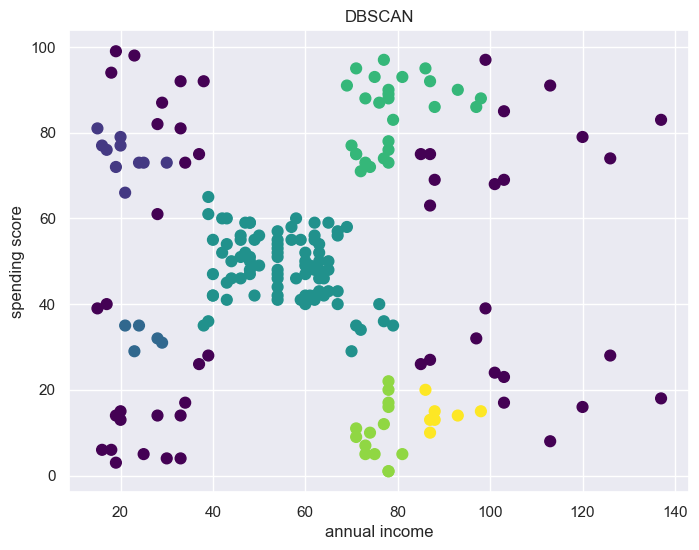

Value - cluster count
Cluster
 2    87
-1    50
 3    27
 4    14
 0    10
 5     7
 1     5
Name: count, dtype: int64


In [11]:
# visualize
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=df['Cluster'],cmap='viridis',s=60)
plt.title('DBSCAN')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()
print('Value - cluster count')
print(df['Cluster'].value_counts())